In [16]:
import numpy as np
import mne # docu: https://mne.tools/stable/overview/index.html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PCIst import pci_st # https://github.com/renzocom/PCIst

import sys
sys.path.append('../src/') 
from pci import calculate # https://github.com/noreun/pypci, ale neško mi to nainstalovat, tak jsem si to stáhla a uložila do src/

%matplotlib widget

In [17]:
patient_number = 5
path_to_folder = f"../data_ukazka/sub-S0{patient_number}/"
epochs_file = f"sub-S0{patient_number}-epochs.fif"

Reading /home/katterrina/fi_muni/0_diplomka/notebooks/../data_ukazka/sub-S05/sub-S05-epochs.fif ...
    Found the data of interest:
        t =    -100.00 ...     500.00 ms
        0 CTF compensation matrices available


/tmp/ipykernel_33659/408832914.py:1: RuntimeWarning: This filename (../data_ukazka/sub-S05/sub-S05-epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs(path_to_folder+epochs_file)


Not setting metadata
331 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


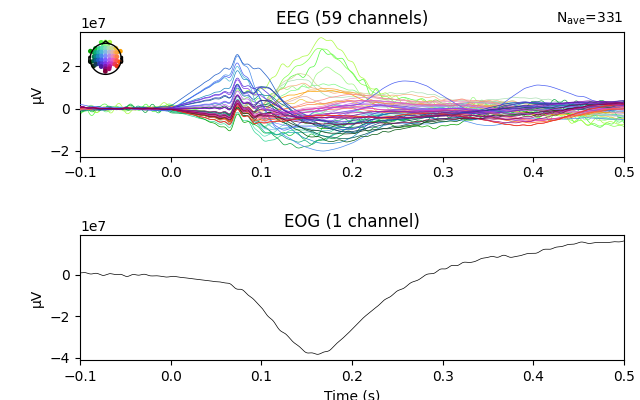

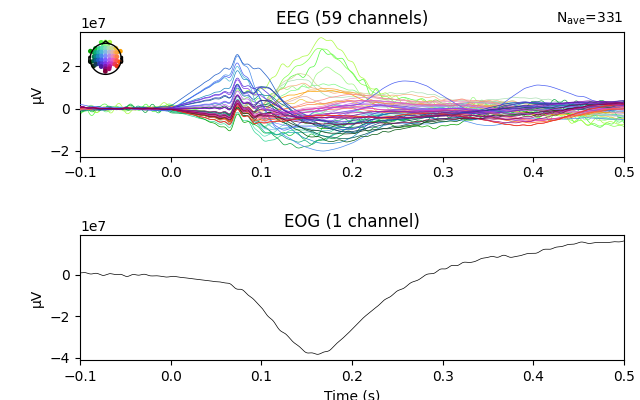

In [18]:
epochs = mne.read_epochs(path_to_folder+epochs_file)
epochs.average("all").plot();
plt.show();

In [19]:
epochs_data = epochs.get_data() # (n_epochs, n_channels, n_times)
epochs_data_averaged = np.mean(epochs_data,axis=0)
epochs.times

array([-0.1       , -0.09931034, -0.09862069, -0.09793103, -0.09724138,
       -0.09655172, -0.09586207, -0.09517241, -0.09448276, -0.0937931 ,
       -0.09310345, -0.09241379, -0.09172414, -0.09103448, -0.09034483,
       -0.08965517, -0.08896552, -0.08827586, -0.08758621, -0.08689655,
       -0.0862069 , -0.08551724, -0.08482759, -0.08413793, -0.08344828,
       -0.08275862, -0.08206897, -0.08137931, -0.08068966, -0.08      ,
       -0.07931034, -0.07862069, -0.07793103, -0.07724138, -0.07655172,
       -0.07586207, -0.07517241, -0.07448276, -0.0737931 , -0.07310345,
       -0.07241379, -0.07172414, -0.07103448, -0.07034483, -0.06965517,
       -0.06896552, -0.06827586, -0.06758621, -0.06689655, -0.0662069 ,
       -0.06551724, -0.06482759, -0.06413793, -0.06344828, -0.06275862,
       -0.06206897, -0.06137931, -0.06068966, -0.06      , -0.05931034,
       -0.05862069, -0.05793103, -0.05724138, -0.05655172, -0.05586207,
       -0.05517241, -0.05448276, -0.0537931 , -0.05310345, -0.05

In [20]:
par = {'baseline_window':(-0.1,-0.01), 'response_window':(0.05,0.5), 'k':1.2, 'min_snr':1.1, 'max_var':90, 'embed':False,'n_steps':10} # 
pci_st = pci_st.calc_PCIst(epochs_data_averaged, epochs.times, full_return=True, **par)

In [21]:
pci_st

{'PCI': 14.389570552147239,
 'dNST': [6.185582822085889, 8.20398773006135],
 'n_dims': 2,
 'D_base': array([[[0.        , 0.19036155, 0.4161131 , ..., 0.91705447,
          0.81229916, 0.6845722 ],
         [0.19036155, 0.        , 0.22575156, ..., 0.72669292,
          0.62193761, 0.49421065],
         [0.4161131 , 0.22575156, 0.        , ..., 0.50094136,
          0.39618605, 0.26845909],
         ...,
         [0.91705447, 0.72669292, 0.50094136, ..., 0.        ,
          0.10475531, 0.23248227],
         [0.81229916, 0.62193761, 0.39618605, ..., 0.10475531,
          0.        , 0.12772696],
         [0.6845722 , 0.49421065, 0.26845909, ..., 0.23248227,
          0.12772696, 0.        ]],
 
        [[0.        , 0.03418629, 0.01203222, ..., 4.7672856 ,
          4.9231665 , 5.05360839],
         [0.03418629, 0.        , 0.04621851, ..., 4.80147189,
          4.9573528 , 5.08779469],
         [0.01203222, 0.04621851, 0.        , ..., 4.75525338,
          4.91113429, 5.04157618],
 

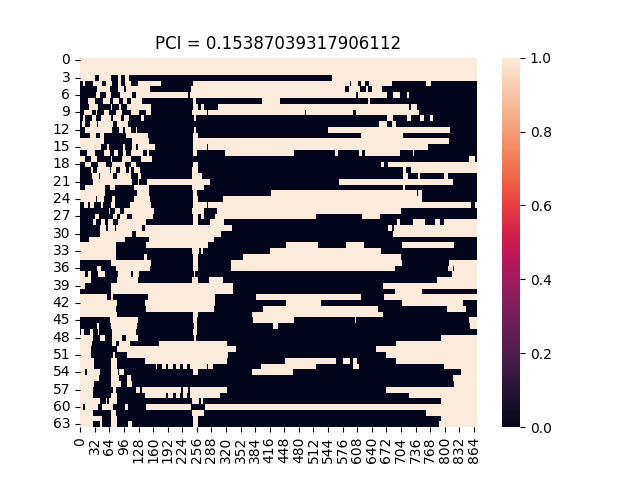

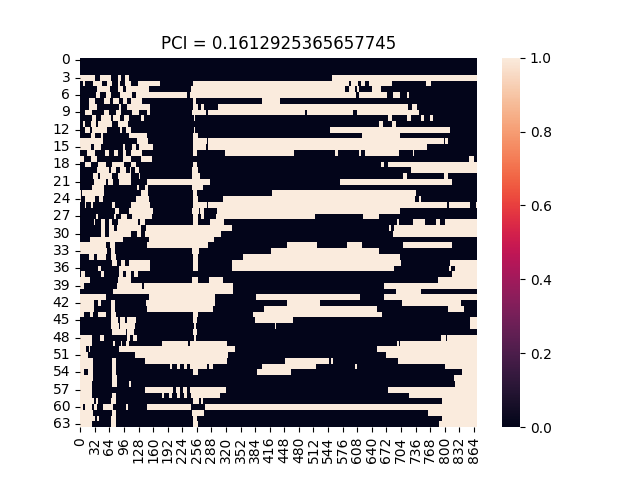

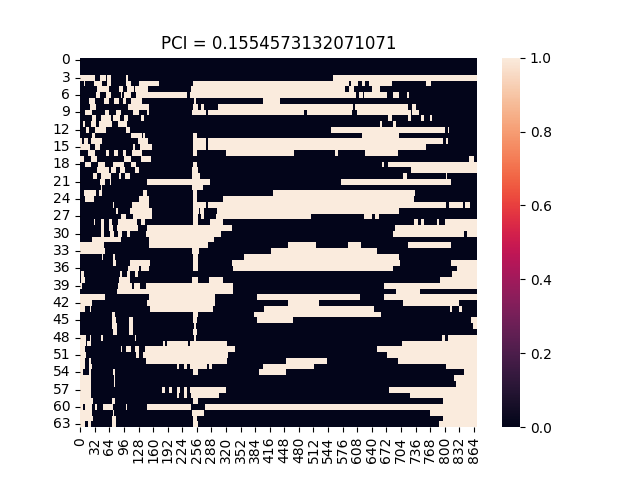

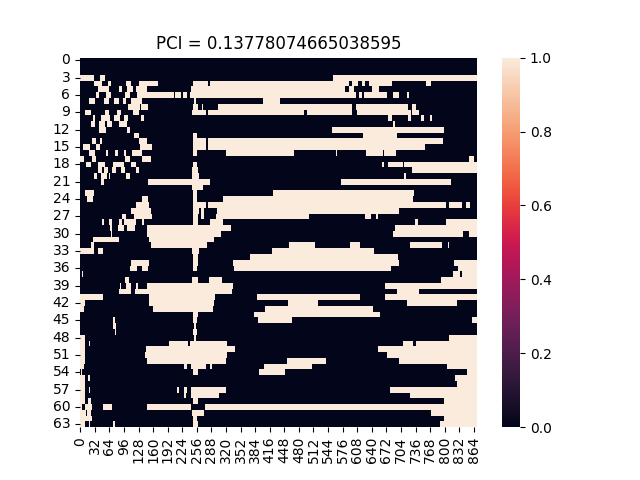

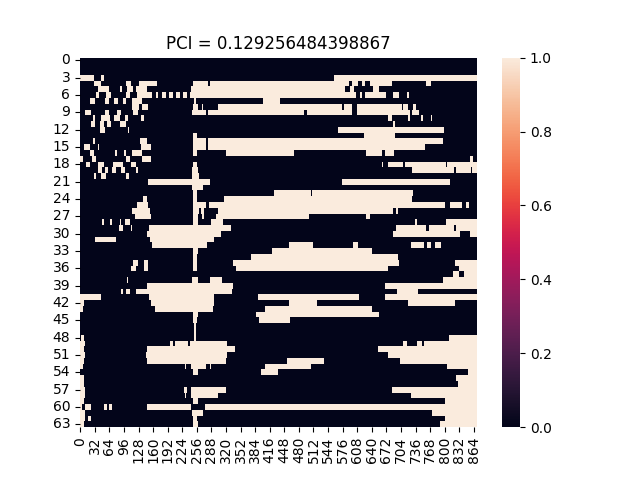

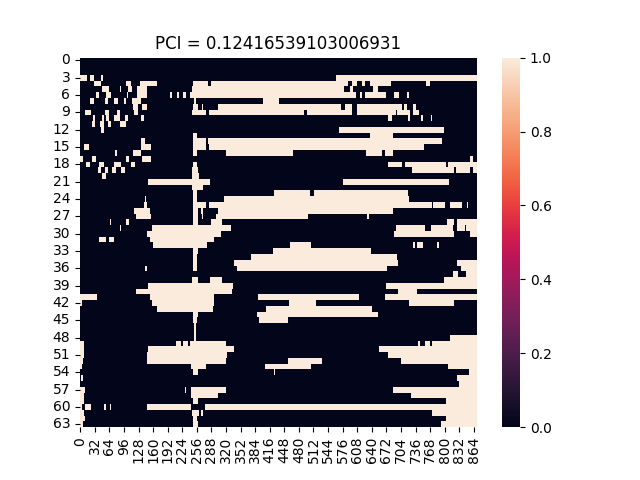

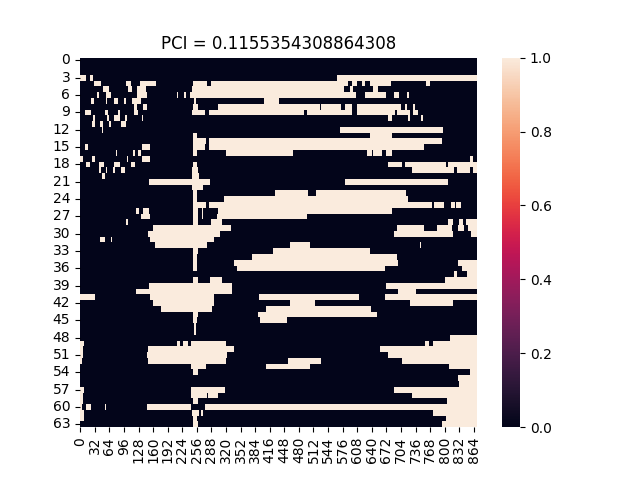

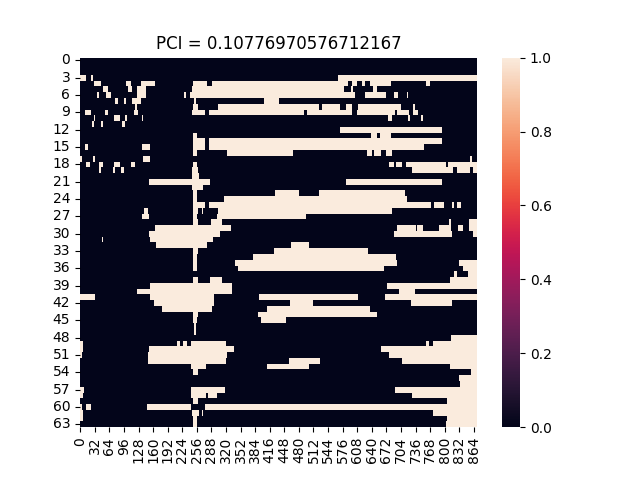

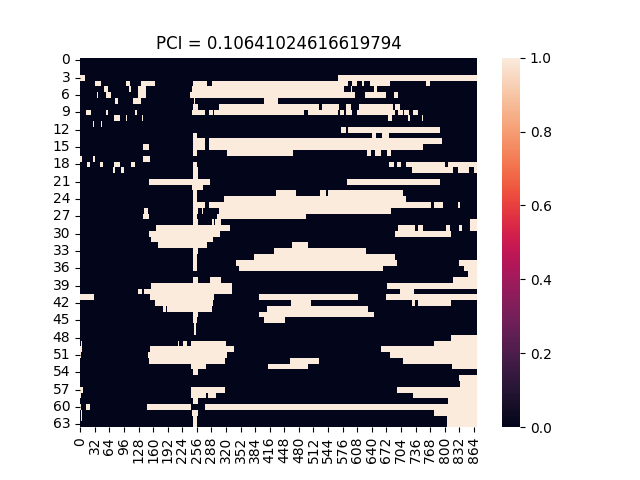

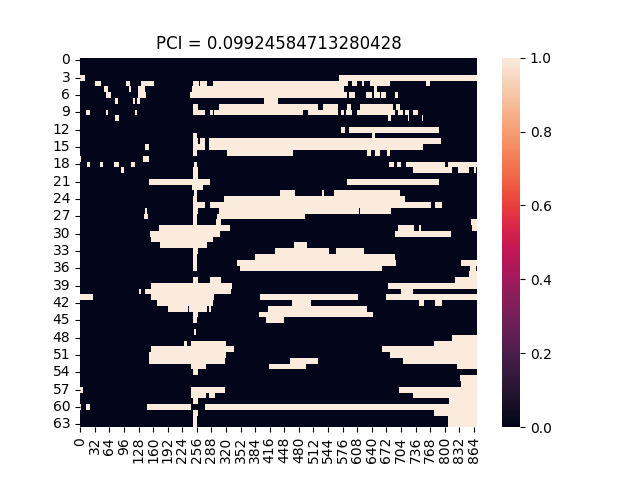

In [40]:
pcis = []
thresholds = []

for i in range(10):
    t = i/10
    # ta binarizace je tady špatně, v článku mají ještě source modeling, možná pomůže https://mne.tools/stable/auto_tutorials/inverse/70_eeg_mri_coords.html
    binarized = np.zeros(epochs_data_averaged.shape,dtype="int32")
    binarized[epochs_data_averaged>t] = 1

    pci = calculate(binarized)

    thresholds.append(t)
    pcis.append(pci)

    plt.figure()
    sns.heatmap(binarized)
    plt.title(f"PCI = {pci}")
    plt.show();

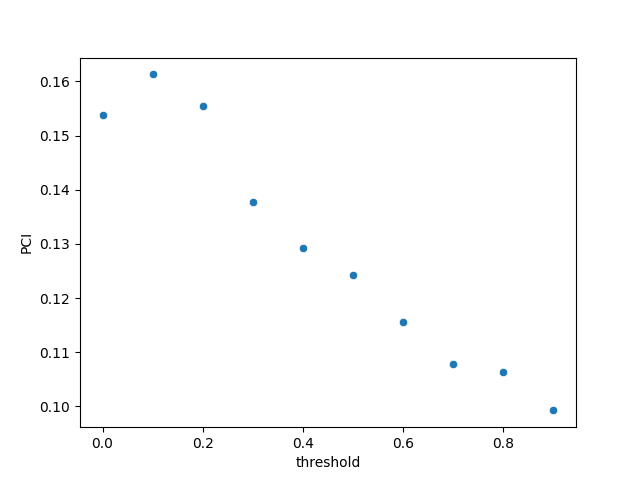

In [42]:
plt.figure()
sns.scatterplot(x=thresholds,y=pcis)
plt.xlabel("threshold")
plt.ylabel("PCI")
plt.show();